In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from skimage import data

## 2D case

In [2]:
orig_img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\scans-DICOM\NLD-AMPH-0028.dcm')
orig_img_data = sitk.GetArrayFromImage(orig_img)

In [ ]:
orig_seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\segmentations-ORIGINALS\NLD-AMPH-0028.nii.gz')
orig_seg_data = sitk.GetArrayFromImage(orig_img)

In [14]:
gray_img = rgb2gray(orig_img_data[0,:,:,:])

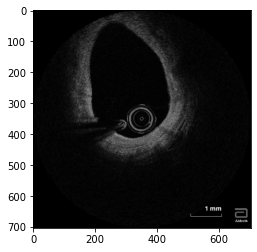

In [16]:
plt.imshow(gray_img, cmap=plt.cm.gray)

In [19]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    mask = np.expand_dims(mask,0)
    return mask

circular_mask = create_circular_mask(gray_img.shape[0], gray_img.shape[1], radius=346)
gray_img_masked = np.invert(circular_mask) * gray_img

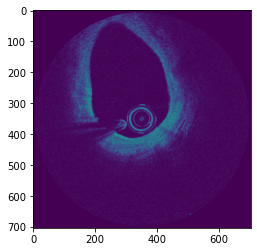

In [20]:
plt.imshow(gray_img_masked[0,:,:])

In [9]:
frame = 27

orig_img_2d = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task502_CardiacOCT\imagesTr\ESTNEMC0027_1_frame{}_001_0000.nii.gz'.format(frame))
orig_img_2d_data = sitk.GetArrayFromImage(orig_img_2d)

orig_img_2d_silvan = sitk.ReadImage(r'Z:\silvan\\Projects\CardiacOCT_nnunet\nnUNet_raw_data\Task102_CardiacOCT\imagesTr\EST-NEMC-0027-RCA_frame_{}_0_0000.nii.gz'.format(frame+1))
orig_img_2d_data_silvan = sitk.GetArrayFromImage(orig_img_2d_silvan)

orig_img_2d_new = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\imagesTr\ESTNEMC0027_1_frame{}_001_0000.nii.gz'.format(frame))
orig_img_2d_data_new = sitk.GetArrayFromImage(orig_img_2d_new)

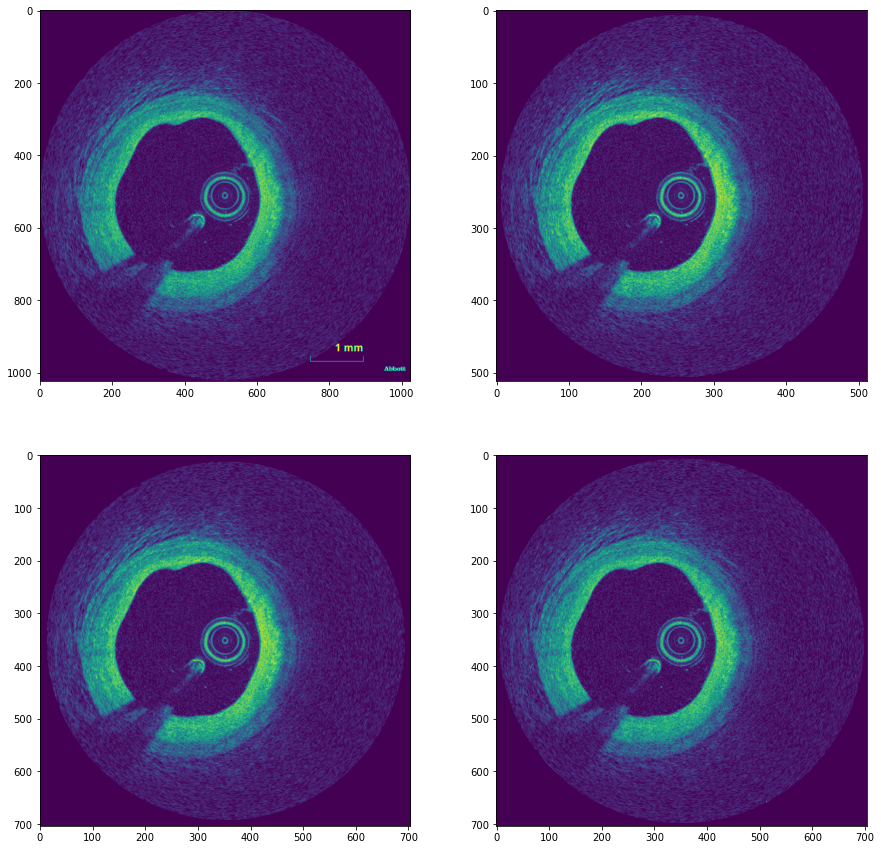

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

axes = axes.flatten()

axes[0].imshow(orig_img_data[frame,:,:,0])
axes[1].imshow(orig_img_2d_data_silvan[0])
axes[2].imshow(orig_img_2d_data[0])
axes[3].imshow(orig_img_2d_data_new[0])


In [10]:
orig_img_2d_data_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [22]:
orig_img_2d_silvan.GetSpacing()

(1.0, 1.0, 999.0)

In [23]:
orig_img_2d_new.GetSpacing()

(2.0, 1.0, 1.0)

In [31]:
new_img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_raw_data\Task503_CardiacOCT\imagesTr\NLDAMPH0047_1_frame63_063_0000.nii.gz')
new_img_data = sitk.GetArrayFromImage(new_img)

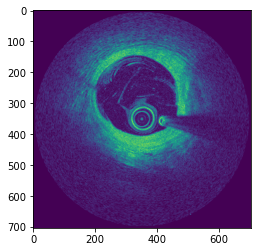

In [34]:
plt.imshow(new_img_data[0])

In [36]:
unique, counts = np.unique(new_img_data[0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 144611]
 [     5  15740]
 [    10  16086]
 [    14  31375]
 [    17  30474]
 [    19  14243]
 [    21  13751]
 [    23  13342]
 [    26  12340]
 [    27  11309]
 [    29  10447]
 [    30   9393]
 [    32   8661]
 [    33   7851]
 [    36   7176]
 [    38   6466]
 [    40  11355]
 [    42   4964]
 [    43   4404]
 [    45   4245]
 [    47   3793]
 [    48   3648]
 [    51   3326]
 [    53   3123]
 [    54   2928]
 [    56   2739]
 [    58   2683]
 [    59   2482]
 [    61   4815]
 [    63   2279]
 [    65   2098]
 [    67   2031]
 [    68   2017]
 [    70   1881]
 [    71   1875]
 [    73   1747]
 [    74   1793]
 [    76   1684]
 [    79   1598]
 [    80   1571]
 [    81   3042]
 [    83   1361]
 [    85   1433]
 [    86   1372]
 [    88   1300]
 [    90   1305]
 [    92   1246]
 [    94   1191]
 [    95   1154]
 [    97   1151]
 [    98   1103]
 [    99   2036]
 [   101    976]
 [   103    981]
 [   104    910]
 [   107    976]
 [   108    881]
 [   109    902]
 [   111    86

In [37]:
orig_img = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\extra scans DICOM\NLD-AMPH-0047.dcm')
orig_img_data = sitk.GetArrayFromImage(orig_img)

In [38]:
unique, counts = np.unique(orig_img_data[63,:,:,0], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 134455]
 [     5  16584]
 [    10  16907]
 [    14  32942]
 [    17  31956]
 [    19  14868]
 [    21  14325]
 [    23  13919]
 [    26  12843]
 [    27  11721]
 [    29  10838]
 [    30   9705]
 [    32   8960]
 [    33   8090]
 [    36   7365]
 [    38   6644]
 [    40  11598]
 [    42   5027]
 [    43   4465]
 [    45   4290]
 [    47   3829]
 [    48   3679]
 [    51   3342]
 [    53   3142]
 [    54   2944]
 [    56   2744]
 [    58   2684]
 [    59   2485]
 [    61   4817]
 [    63   2280]
 [    65   2099]
 [    67   2031]
 [    68   2017]
 [    70   1881]
 [    71   1877]
 [    73   1747]
 [    74   1793]
 [    76   1684]
 [    79   1598]
 [    80   1571]
 [    81   3042]
 [    83   1364]
 [    85   1433]
 [    86   1372]
 [    88   1300]
 [    90   1305]
 [    92   1250]
 [    94   1191]
 [    95   1154]
 [    97   1151]
 [    98   1103]
 [    99   2036]
 [   101    976]
 [   103    981]
 [   104    911]
 [   107    976]
 [   108    881]
 [   109    902]
 [   111    86

## 3D case

In [2]:
img_3d = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-3d\nnUNet_raw_data\Task505_CardiacOCT\imagesTr\EST-NEMC-0027_1_split1_001_0000.nii.gz')
img_3d_data = sitk.GetArrayFromImage(img_3d)

In [23]:
img_3d_orig = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data-original\extra-scans-DICOM-2\NLD-RADB-0093.dcm')
img_3d_data_orig = sitk.GetArrayFromImage(img_3d_orig)

In [9]:
frame = 0
unique, counts = np.unique(img_3d_data[:,:,frame], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 156117]
 [     5  21865]
 [    10  21405]
 [    14  39849]
 [    17  36364]
 [    19  16555]
 [    21  15003]
 [    23  14511]
 [    26  12834]
 [    27  11393]
 [    29  10243]
 [    30   9116]
 [    32   7870]
 [    33   6883]
 [    36   5940]
 [    38   5334]
 [    40   8189]
 [    42   3440]
 [    43   3014]
 [    45   2686]
 [    47   2339]
 [    48   2201]
 [    51   1975]
 [    53   1843]
 [    54   1651]
 [    56   1549]
 [    58   1394]
 [    59   1360]
 [    61   2594]
 [    63   1201]
 [    65   1154]
 [    67   1120]
 [    68   1114]
 [    70   1058]
 [    71   1075]
 [    73   1027]
 [    74    989]
 [    76    942]
 [    79    954]
 [    80    961]
 [    81   1826]
 [    83    923]
 [    85    863]
 [    86    876]
 [    88    793]
 [    90    857]
 [    92    823]
 [    94    786]
 [    95    808]
 [    97    787]
 [    98    813]
 [    99   1576]
 [   101    780]
 [   103    797]
 [   104    801]
 [   107    762]
 [   108    829]
 [   109    797]
 [   111    79

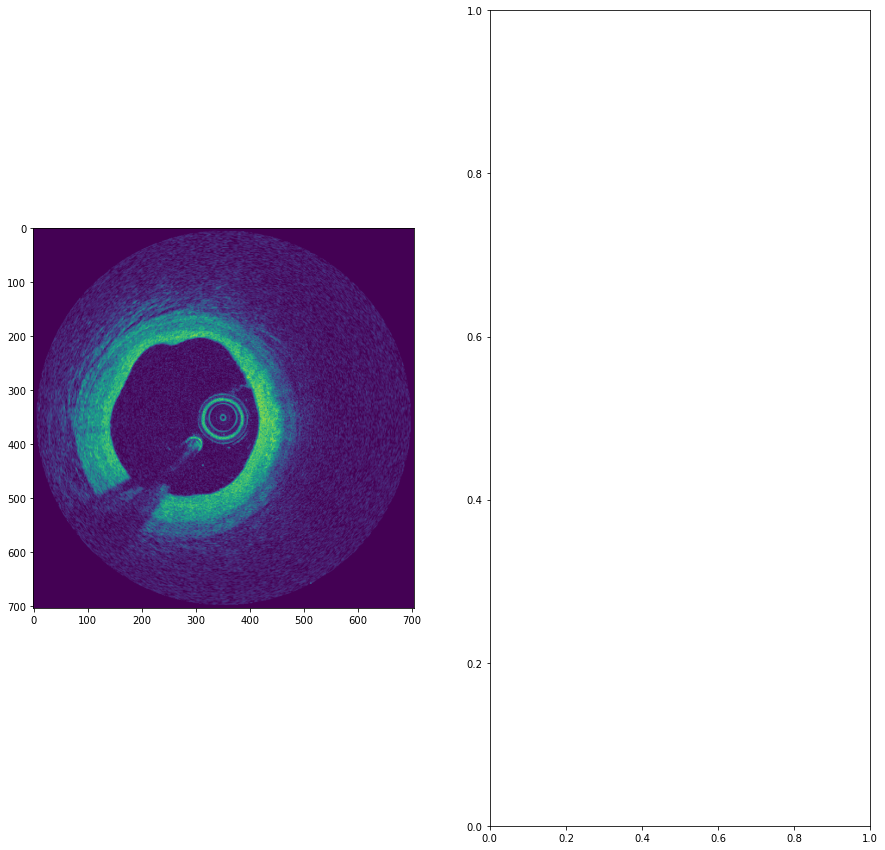

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15,15))

axes = axes.flatten()

axes[0].imshow(img_3d_data[:,:,frame])
#axes[0].imshow(img_3d_data_orig[frame,:,:,:])